Get data

In [6]:
!pip3 install tqdm

     |████████████████████████████████| 69 kB 483 kB/s eta 0:00:01


In [1]:
# Чтобы скачать с кагла нужно сгенерить апи, создать в гугл драйве папку Kaggle и туда засунуть файл kaggle.json, который качается с кагла
# Пни меня, Ринат, если что, я покажу, что делать для скачивания. Вообще вот ссыль с инструкцией:
# https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a

# я предлагаю, чтобы не было такой ебли - закинуть потом зип на облако (не гугл)

import os
from IPython.display import clear_output
import cv2
from sklearn.manifold import TSNE
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px



Run only in collab:

In [116]:
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/gdrive')
    os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

    !pip install kaggle
    !mkdir data
    !kaggle datasets download -d gpiosenka/100-bird-species
    !unzip 100-bird-species.zip -d data

    clear_output()

In [12]:
DATA_PATH = f'{os.getcwd()}/data'
TRAIN_PATH = f'{DATA_PATH}/train'
TEST_PATH = f'{DATA_PATH}/test'
TYPE_PATH = "{}/{}"

NUM_ELEMENTS_TO_SHOW = 200

from tqdm import tqdm

def get_data_and_labels(n_first_classes = None):
    types = os.listdir(TRAIN_PATH)

    train, test = [], []
    
    n_class = 0
    for tp in tqdm(types):
        if (n_class == n_first_classes):
            break
            
        train_type_path = TYPE_PATH.format(TRAIN_PATH,tp)
        for img in os.listdir(train_type_path):
            image = cv2.imread(TYPE_PATH.format(train_type_path,img), cv2.IMREAD_COLOR)
            train.append([tp,image])

        test_type_path = TYPE_PATH.format(TEST_PATH,tp)
        for img in os.listdir(test_type_path):
            image = cv2.imread(TYPE_PATH.format(test_type_path,img), cv2.IMREAD_COLOR)
            test.append([tp,image])
        n_class += 1
        
    train_labels = [i[0] for i in train]
    train_data = [i[1] for i in train]

    test_labels = [i[0] for i in test]
    test_data = [i[1] for i in test]
    print("Loading data done")
    
    return train_labels, train_data, test_labels, test_data

train_labels, train_data, test_labels, test_data = get_data_and_labels(n_first_classes = 3)

  1%|▏         | 3/225 [00:13<16:09,  4.37s/it]

Loading data done


In [43]:
types = list(set(train_labels))
encoder = {key: ind for key, ind in enumerate(types)}
decoder = {val: key for key, val in encoder.items()}
encoder

{0: 'AFRICAN FIREFINCH', 1: 'ALBATROSS', 2: 'ALEXANDRINE PARAKEET'}

In [55]:
train_labels, test_labels = np.array(train_labels), np.array(test_labels)
train_data, test_data = np.array(train_data), np.array(test_data)

In [97]:
train_data.shape

(438, 224, 224, 3)

In [45]:
print(len(test_data), len(test_labels), len(train_data), len(train_labels))

15 15 438 438


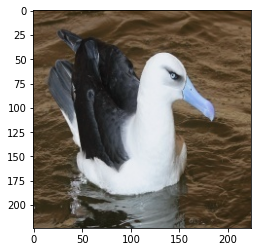

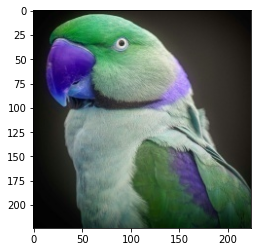

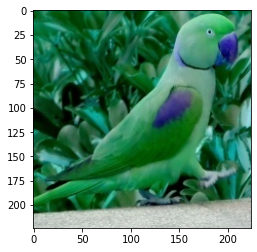

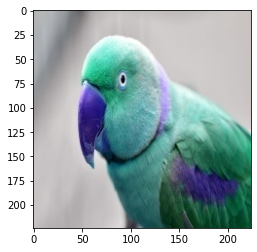

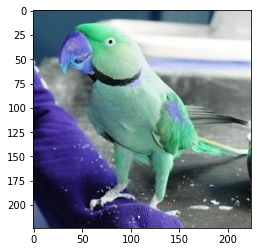

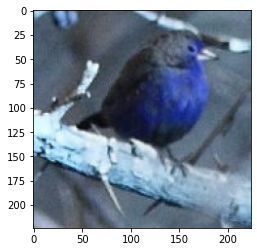

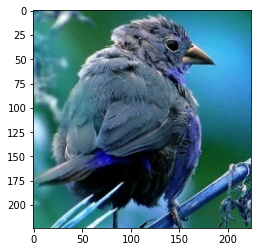

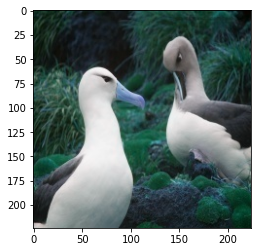

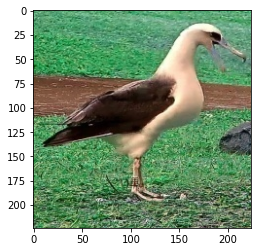

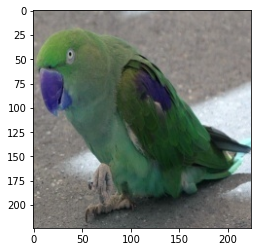

<Figure size 432x288 with 0 Axes>

In [56]:
from random import choice
for i in range(10):
    plt.imshow(choice(train_data))
    plt.figure()

In [ ]:
def show_examples(imgs):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.imshow(imgs[i])
    plt.show()

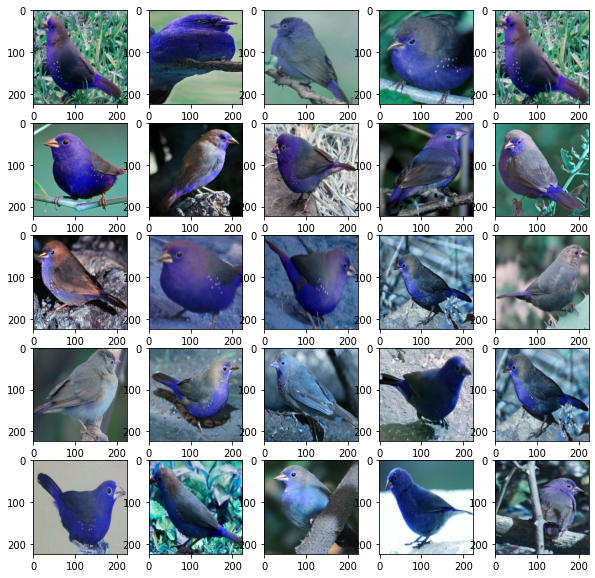

In [91]:
show_examples(train_data)

In [111]:
from sklearn.model_selection import train_test_split

TSNE_TRAIN_SHAPE = (40, 40)

def train_embeddings(data):
    return TSNE(n_components=3).fit_transform(data)


def get_tsne_train_data(imgs, labels):
    resized = np.array([cv2.resize(im, TSNE_TRAIN_SHAPE) for im in imgs])
    X_Data, _, X_labels, _ = train_test_split(resized, labels, test_size=0.8)
    return X_Data.flatten().reshape(X_Data.shape[0], TSNE_TRAIN_SHAPE[0] * TSNE_TRAIN_SHAPE[1] * 3), X_labels


In [112]:
tsne_train_data, tsne_train_labels = get_tsne_train_data(train_data, train_labels)
print(len(tsne_train_data), len(tsne_train_labels))
tsne_embeddings = train_embeddings(tsne_train_data)

87 87


In [113]:
def plot2d(tsne, labels, num):
    palette = sb.color_palette("bright", np.unique(labels[:num]).shape[0])
    plot = sb.scatterplot(tsne[:, 0], tsne[:, 1], hue=labels[:num], legend='full', palette=palette).set_title(
        "Distribution")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
def plot3d(tsne, train_labels, num):
    fig = px.scatter_3d(x=tsne[::, 0],
                        y=tsne[::, 1],
                        z=tsne[::, 2],
                        color=[str(label) for label in train_labels[:num]],
                        opacity=0.7)
    fig.show()


/home/redmoon/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


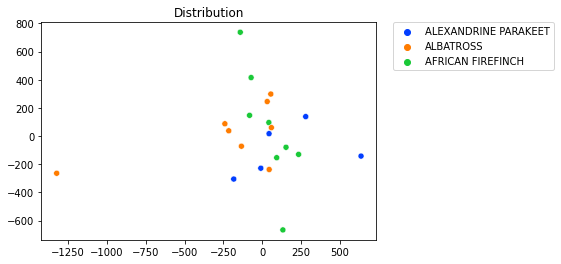

In [110]:
plot2d(tsne_embeddings, tsne_train_labels, len(tsne_embeddings))

In [114]:
plot3d(tsne_embeddings, tsne_train_labels, len(tsne_embeddings))